<a href="https://colab.research.google.com/github/Pdias81/Data-Science/blob/main/%5BTemplate%5D_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 



### Enquadramento:

A COVID-19 é uma doença infecciosa causada pelo coronavírus SARS-CoV-2. 

Foi descoberta na China em dezembro de 2019 e se espalhou rapidamente por todo o mundo, sendo declarada uma pandemia global em março de 2020 pela Organização Mundial da Saúde.

A transmissão ocorre principalmente por meio de gotículas respiratórias quando uma pessoa infectada tosse, espirra ou fala. 

Os sintomas da doença variam de leves a graves e incluem febre, tosse seca, fadiga, perda de paladar ou olfato, dor de cabeça e dificuldade para respirar. 

As vacinas são uma medida importante para prevenir a doença, no entanto em caso de infecção o tratamento depende da gravidade dos sintomas e pode incluir repouso, medicação para aliviar a dor e o desconforto, oxigenoterapia e terapia antiviral.

A COVID-19 continua sendo uma preocupação global de saúde pública e requer esforços coordenados de governos, organizações de saúde e indivíduos para controlar sua disseminação.

<center><img alt="Colaboratory logo" width="50%" src="https://images.unsplash.com/photo-1584036561566-baf8f5f1b144?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8Y292aWR8ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60"></center>


Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam neste grupo, têm uma recuperação sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

De forma a conseguirmos identificar a evolução da COVID-19 no Mundo e em particular no Brasil, nomeadamente o nº de casos e mortes, iremos realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados em análise foram obtidos do site ourworldindata.org/coronavirus, pelo que podemos esperar uma boa fiabilidade. Apesar disso poderá haver discrepâncias entre os dados oficiais e não oficiais das várias Entidades/Estados envolvidos.





### Dicionário de Variáveis
* *Para melhor interpretação, iremos descrever as variáveis em análise:*
(Nota: só serão descritas as variáveis que foram utilizadas nesta análise)
  *  `iso_code` - ISO 3166-1 alpha-3 – three-letter country codes
  *  `continent` - Continentes 
  *  `location`- Localização geográfica
  *  `date`- Data de observação
  *  `total_cases`- Total de casos confirmados COVID-19
  *  `new_cases`- Novos casos confirmados COVID-19
  *  `new_cases_smoothed`- Novos casos confirmados (7 dias suavizado)
  *  `total_deaths`- Total de mortes atribuídas à COVID-19
  *  `new_deaths`- Novas mortes atribuídas à COVID-19
  *  `new_deaths_smoothed`- Novas mortes atribuídas à COVID-19 (7 dias suavizado)
  *  `population`- População

### Importando os dados do COVID-19

* Para início da nossa análise vamos começar por importar os nossos dados. Para esse efeito iremos utilizar o `pandas`, o `matplotlib`, o `seaborn`e o `numpy`.

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

* *Começamos por verificar o tamanho do DataFrame importado:*

In [3]:
df.shape

(299071, 67)

* Em seguida analisamos a 5 primeiras entradas:

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


* Extraimos o nome das colunas existentes:

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

* Verificamos o tipo de variáveis presentes:

In [6]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Para uma análise mais fiável, iremos analisar a quantidade de dados ausentes:

In [7]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                      0.969880
weekly_icu_admissions_per_million          0.969880
excess_mortality_cumulative_absolute       0.965577
excess_mortality_cumulative_per_million    0.965577
excess_mortality_cumulative                0.965577
                                             ...   
new_deaths_per_million                     0.028037
population                                 0.000000
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

Conseguimos apurar que, para a nossa análise não existem muitos dados ausentes que possam afetar os resultados.

Uma vez que a variável `date` não está em formato datetime, teremos de a transformar:

In [8]:
df.date = pd.to_datetime(df.date)

* Analisamos agora os Continentes com maior números de casos, tendo como referência o dia 01/03/2023:

In [9]:
df.loc[df.date == '2023-03-01'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
295494,OWID_WRL,NaN,World,2023-03-01,758118902.0,130814.0,157838.143,6863361.0,680.0,1120.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
114578,OWID_HIC,NaN,High income,2023-03-01,415682941.0,85824.0,116880.143,2824898.0,482.0,815.143,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
15343,OWID_ASI,NaN,Asia,2023-03-01,294647921.0,39547.0,38106.286,1623682.0,145.0,179.143,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
83836,OWID_EUR,NaN,Europe,2023-03-01,246341635.0,70805.0,61991.571,2023892.0,393.0,381.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
284939,OWID_UMC,NaN,Upper middle income,2023-03-01,242094090.0,43687.0,38345.857,2648613.0,189.0,273.000,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196363,OWID_NIR,Europe,Northern Ireland,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.896000e+06,NaN,NaN,NaN,NaN
235309,OWID_SCT,Europe,Scotland,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.466000e+06,NaN,NaN,NaN,NaN
261304,TWN,Asia,Taiwan,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,2.389340e+07,NaN,NaN,NaN,NaN
274301,TKM,Asia,Turkmenistan,2023-03-01,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,100.00,7.400,68.19,0.715,6.430777e+06,NaN,NaN,NaN,NaN


E os Continentes com o maior número de mortes, tendo a mesma data de referência:

In [10]:
df.loc[df.date == '2023-03-01'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
295494,OWID_WRL,NaN,World,2023-03-01,758118902.0,130814.0,157838.143,6863361.0,680.0,1120.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
114578,OWID_HIC,NaN,High income,2023-03-01,415682941.0,85824.0,116880.143,2824898.0,482.0,815.143,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
284939,OWID_UMC,NaN,Upper middle income,2023-03-01,242094090.0,43687.0,38345.857,2648613.0,189.0,273.000,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
83836,OWID_EUR,NaN,Europe,2023-03-01,246341635.0,70805.0,61991.571,2023892.0,393.0,381.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
15343,OWID_ASI,NaN,Asia,2023-03-01,294647921.0,39547.0,38106.286,1623682.0,145.0,179.143,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268391,TKL,Oceania,Tokelau,2023-03-01,5.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,81.86,NaN,1.893000e+03,NaN,NaN,NaN,NaN
274301,TKM,Asia,Turkmenistan,2023-03-01,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,100.00,7.400,68.19,0.715,6.430777e+06,NaN,NaN,NaN,NaN
276665,TUV,Oceania,Tuvalu,2023-03-01,2779.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,67.57,NaN,1.133500e+04,NaN,NaN,NaN,NaN
289671,VAT,Europe,Vatican,2023-03-01,26.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,75.12,NaN,8.080000e+02,NaN,NaN,NaN,NaN


Analisamos agora os 5 Continentes com maior número de mortes:

In [11]:
df.loc[df.date == '2023-03-01', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

,location,total_deaths
114578,High income,2824898.0
284939,Upper middle income,2648613.0
83836,Europe,2023892.0
15343,Asia,1623682.0
192182,North America,1581160.0


Podemos concluir que, em 01/03/2023, a Europa é quem se destaca no maior número de mortes, seguida da Ásia e muito perto está também a América do Norte.

Para uma melhor visualização vamos plotar um gráfico de barras:

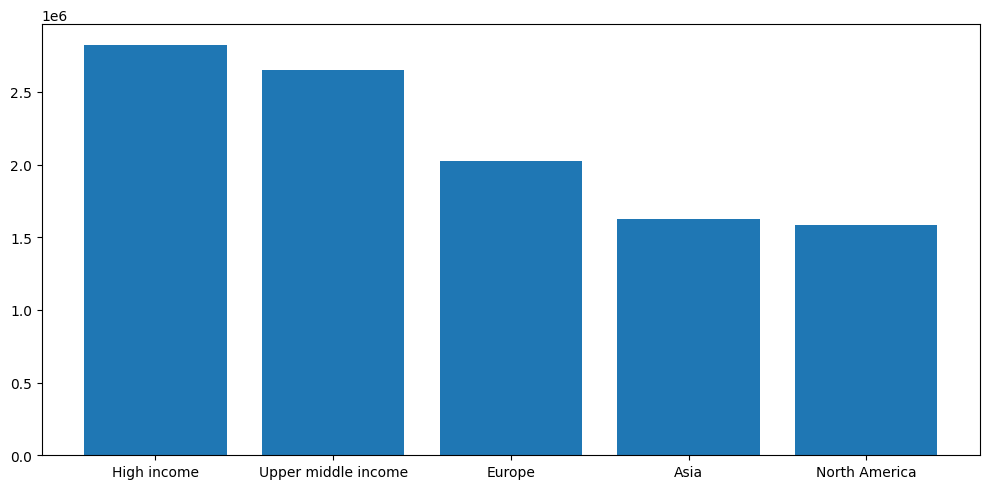

In [12]:
top_5_total_deaths = df.loc[df.date == '2023-03-01', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(10,5))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()



### Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. 

Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

<Axes: >

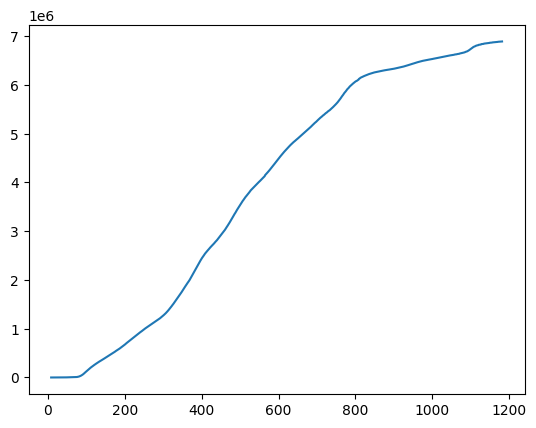

In [13]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()

### Análise Exploratória para o Brasil

* Vamos agora pesquisar e analisar o caso particular do Brasil quanto ao número de casos e mortes.
   Para isso vamos pesquisar apenas a coluna do Brasil:




In [14]:
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
35472,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
35473,BRA,South America,Brazil,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
35474,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
35475,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
35476,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [15]:
df_brasil.date.max()

Timestamp('2023-03-29 00:00:00')

Pela identificação da data, conseguimos apurar que o dataframe compreende dados desde 03/01/2020 e 29/03/2023.

* Vamos agora identificar quando foi registada a primeira morte no Brasil:

In [16]:
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
35548,BRA,South America,Brazil,2020-03-19,291.0,57.0,36.714,1.0,1.0,0.143,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


* Vamos identificar quando foi registado o primeiro caso:

In [17]:
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[35472]))

O primeiro caso foi registrado em 2020-01-03 00:00:00


* Em seguida, vamos identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registado:

In [18]:
from datetime import date
delta = df_brasil.date.loc[35548] - df_brasil.date.loc[35527]
print('Passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


Por fim, vamos plotar gráficos de linha para compararmos a evolução dos casos e mortes no Brasil:

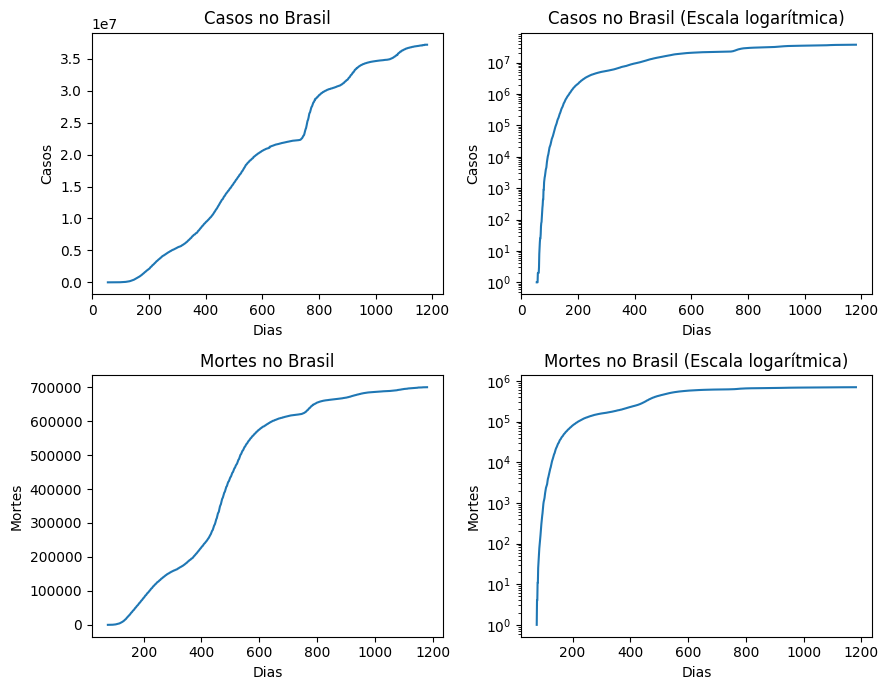

In [19]:
x = list(range(len(df_brasil)))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()

## Conclusão

Um detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados ficará desatualizado "rapidamente".

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* A Europa é o continente que regista mais casos e mais mortes, logo seguido da Ásia.
* A evolução dos casos no Brasil teve um rápido crescimento mas tem vindo a estabilizar.


Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.